In [12]:
import pandas as pd
import utils
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

import importlib
importlib.reload(utils)
from utils import grid_evaluate


#Load the saved CSVs
X_train = pd.read_csv('X_train.csv')
X_validation = pd.read_csv('X_validation.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_validation = pd.read_csv('y_validation.csv')
y_test = pd.read_csv('y_test.csv')

#Squeeze to make them series
y_train = y_train.squeeze()
y_validation = y_validation.squeeze()
y_test = y_test.squeeze()

#Verify shapes
print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)


(747, 28)
(250, 28)
(747,)
(250,)


In [14]:
base_clf = LogisticRegression(max_iter=5000)

#Parameters to be tried together
param_grid = {
    'feature_method': [None, 'polynomial', 'pca', 'rbf'],
    'degree':         [2, 3],
    'n_components':   [5, 10],
    'gamma':          [0.1, 0.5],   
    'C':              [0.001,0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty':        ['l2'], 
    'random_state': [42]
}

results, best_model = grid_evaluate(
    estimator  = base_clf,
    param_grid = param_grid,
    X_train = X_train,
    X_validation = X_validation,
    y_train = y_train,
    y_validation  = y_validation
)


#drop unnecessary columns (neural network columns)
results = results.drop(
    columns=['hidden_layer_sizes','activation','alpha','learning_rate_init'],
    errors='ignore'
)

# best by F1
results = results.sort_values('f1_validation', ascending=False)

print(results)
print(results.iloc[0])




Evaluated 5 parameter combinations...
Evaluated 10 parameter combinations...
Evaluated 15 parameter combinations...
Evaluated 20 parameter combinations...
Evaluated 25 parameter combinations...
Evaluated 30 parameter combinations...
Evaluated 35 parameter combinations...
Evaluated 40 parameter combinations...
Evaluated 45 parameter combinations...
Evaluated 50 parameter combinations...
Evaluated 55 parameter combinations...
Evaluated 60 parameter combinations...
Evaluated 65 parameter combinations...
Evaluated 70 parameter combinations...
Evaluated 75 parameter combinations...
Evaluated 80 parameter combinations...
Evaluated 85 parameter combinations...
Evaluated 90 parameter combinations...
Evaluated 95 parameter combinations...
Evaluated 100 parameter combinations...
Evaluated 105 parameter combinations...
Evaluated 110 parameter combinations...
Evaluated 115 parameter combinations...
Evaluated 120 parameter combinations...
Evaluated 125 parameter combinations...
Evaluated 130 parame

In [15]:
results.to_csv('logistic_regression_results.csv', index=False)
print("Saved results to logistic_regression_results.csv")

print(results.columns.tolist())


Saved results to logistic_regression_results.csv
['feature_method', 'degree', 'n_components', 'gamma', 'accuracy_validation', 'accuracy_train', 'precision_validation', 'recall_validation', 'f1_validation', 'precision_train', 'recall_train', 'f1_train', 'C', 'penalty', 'random_state']


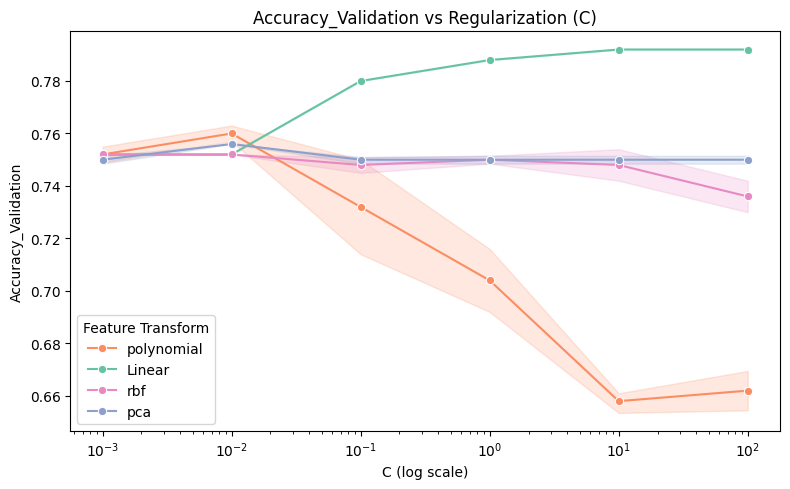

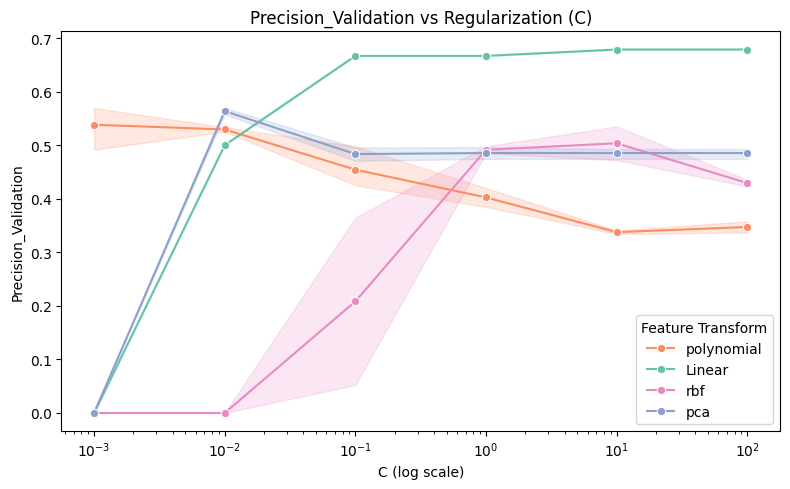

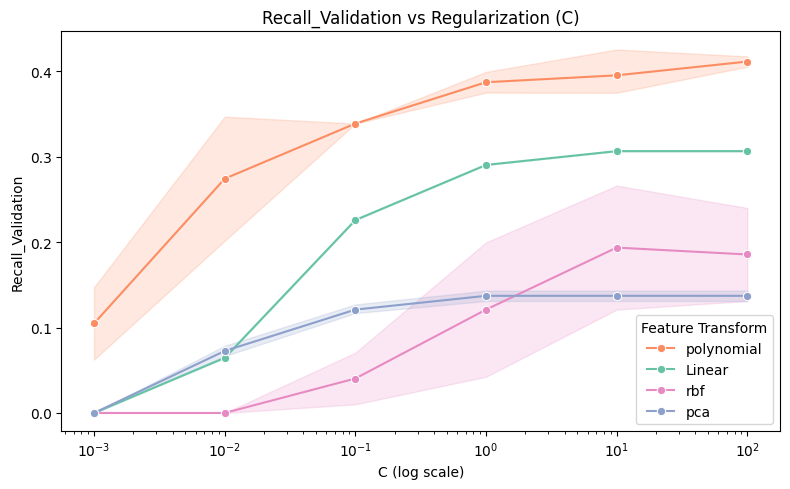

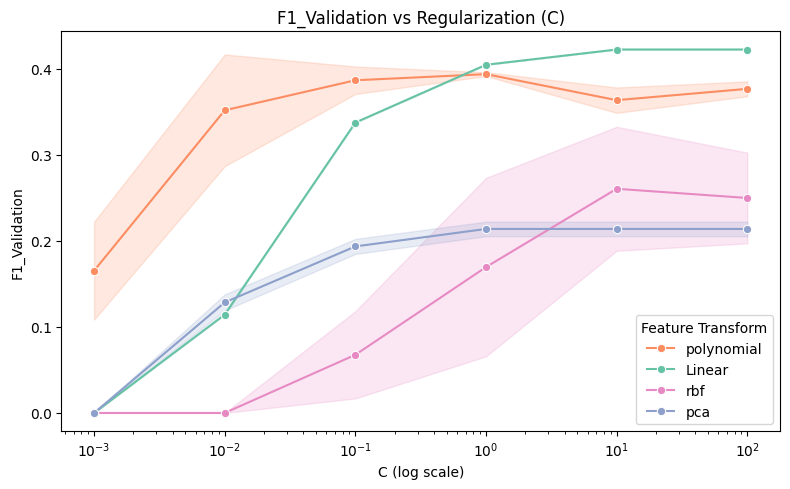

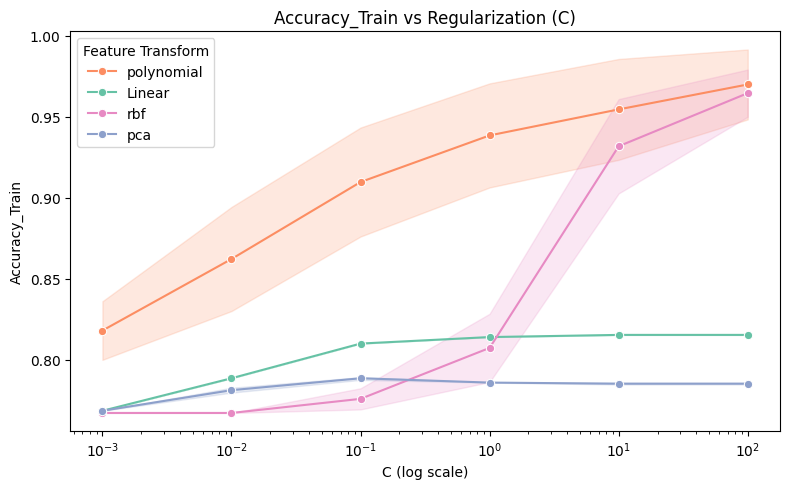

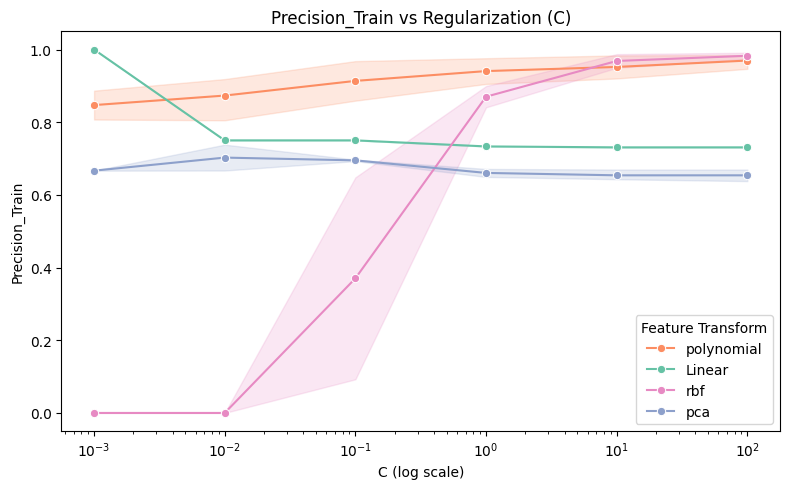

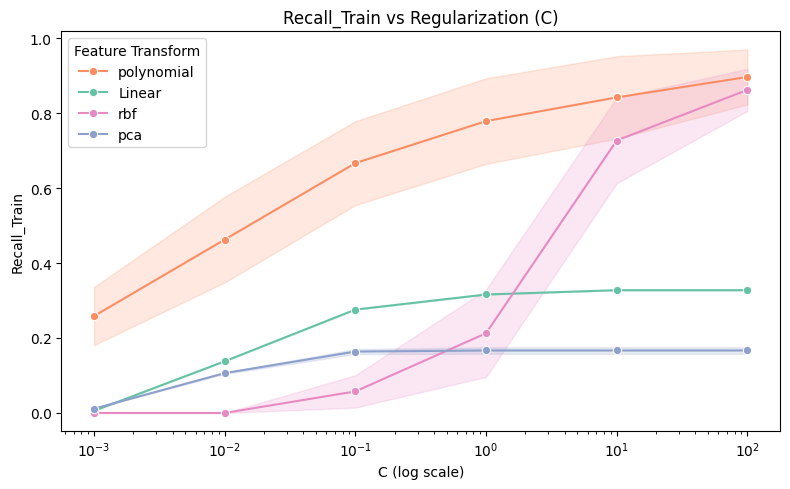

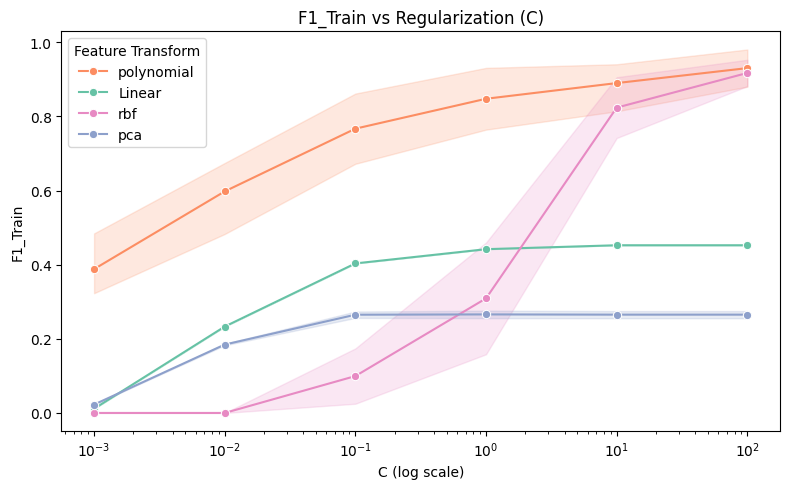

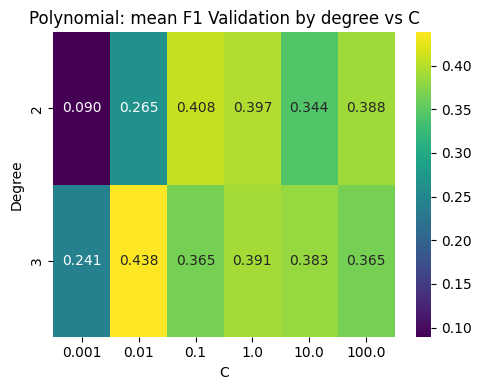

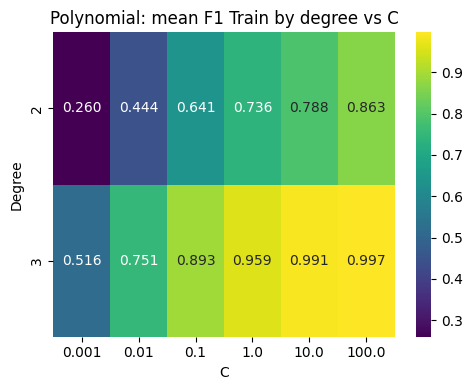

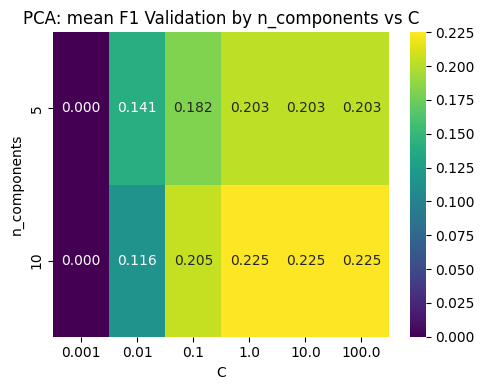

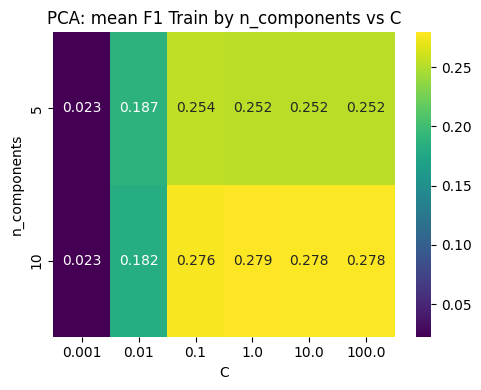

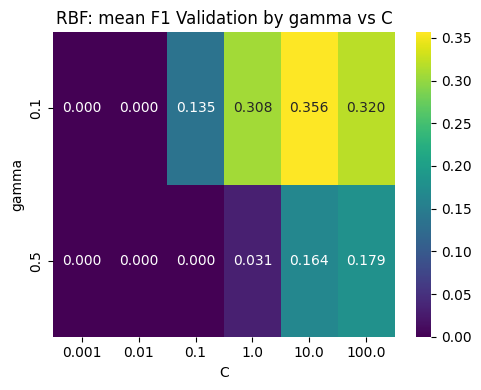

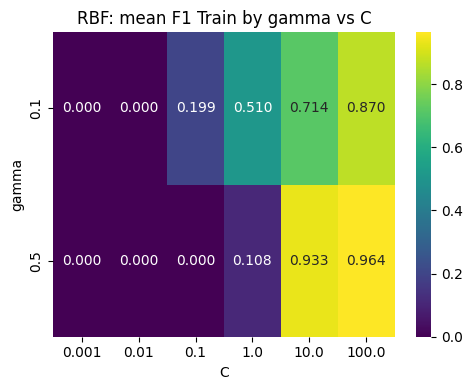

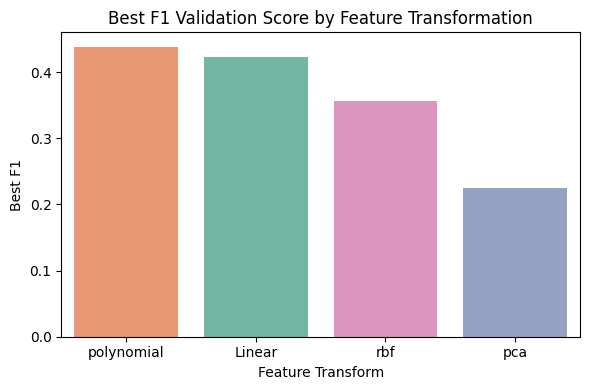

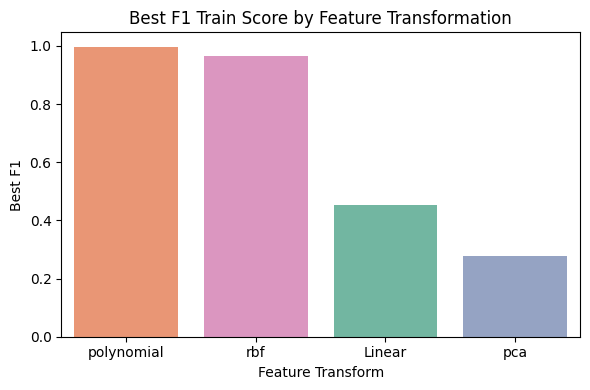

In [16]:
methods = ['Linear','polynomial','pca','rbf']
colors  = sns.color_palette("Set2", n_colors=len(methods))
fixed_palette = dict(zip(methods, colors))

#Line‐plots of each metric vs C 

metrics = [
    'accuracy_validation',
    'precision_validation',
    'recall_validation',
    'f1_validation',
    'accuracy_train',
    'precision_train',
    'recall_train',
    'f1_train',
]

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.lineplot(
        data   = results,
        x      = 'C',
        y      = metric,
        hue    = 'feature_method',
        palette = fixed_palette,
        marker = 'o'
    )
    plt.xscale('log')
    plt.title(f'{metric.title()} vs Regularization (C)')
    plt.ylabel(metric.title())
    plt.xlabel('C (log scale)')
    plt.legend(title='Feature Transform')
    plt.tight_layout()
    plt.show()


#Heatmap for Polynomial: mean F1 by degree vs C
poly = results[results['feature_method']=='polynomial']
if not poly.empty:
    pivot_poly = poly.pivot_table(
        index='degree',
        columns='C',
        values='f1_validation',
        aggfunc='mean'
    )
    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_poly, annot=True, fmt='.3f', cmap='viridis',)
    plt.title('Polynomial: mean F1 Validation by degree vs C')
    plt.ylabel('Degree')
    plt.xlabel('C')
    plt.tight_layout()
    plt.show()

poly = results[results['feature_method']=='polynomial']
if not poly.empty:
    pivot_poly = poly.pivot_table(
        index='degree',
        columns='C',
        values='f1_train',
        aggfunc='mean'
    )
    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_poly, annot=True, fmt='.3f', cmap='viridis',)
    plt.title('Polynomial: mean F1 Train by degree vs C')
    plt.ylabel('Degree')
    plt.xlabel('C')
    plt.tight_layout()
    plt.show()


#Heatmap for PCA: mean F1 by n_components vs C
pca = results[results['feature_method']=='pca']
if not pca.empty:
    pivot_pca = pca.pivot_table(
        index='n_components',
        columns='C',
        values='f1_validation',
        aggfunc='mean'
    )
    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_pca, annot=True, fmt='.3f', cmap='viridis',)
    plt.title('PCA: mean F1 Validation by n_components vs C')
    plt.ylabel('n_components')
    plt.xlabel('C')
    plt.tight_layout()
    plt.show()

pca = results[results['feature_method']=='pca']
if not pca.empty:
    pivot_pca = pca.pivot_table(
        index='n_components',
        columns='C',
        values='f1_train',
        aggfunc='mean'
    )
    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_pca, annot=True, fmt='.3f', cmap='viridis',)
    plt.title('PCA: mean F1 Train by n_components vs C')
    plt.ylabel('n_components')
    plt.xlabel('C')
    plt.tight_layout()
    plt.show()

#Heatmap for RBF: mean F1 by gamma vs C
rbf = results[results['feature_method']=='rbf']
if not rbf.empty:
    pivot_rbf = rbf.pivot_table(
        index='gamma',
        columns='C',
        values='f1_validation',
        aggfunc='mean'
    )
    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_rbf, annot=True, fmt='.3f', cmap='viridis', )
    plt.title('RBF: mean F1 Validation by gamma vs C')
    plt.ylabel('gamma')
    plt.xlabel('C')
    plt.tight_layout()
    plt.show()

rbf = results[results['feature_method']=='rbf']
if not rbf.empty:
    pivot_rbf = rbf.pivot_table(
        index='gamma',
        columns='C',
        values='f1_train',
        aggfunc='mean'
    )
    plt.figure(figsize=(5,4))
    sns.heatmap(pivot_rbf, annot=True, fmt='.3f', cmap='viridis',)
    plt.title('RBF: mean F1 Train by gamma vs C')
    plt.ylabel('gamma')
    plt.xlabel('C')
    plt.tight_layout()
    plt.show()

#validation
best_per = (
    results
    .groupby('feature_method', as_index=False)
    ['f1_validation']
    .max()
    .sort_values('f1_validation', ascending=False)
)

plt.figure(figsize=(6,4))
ax = sns.barplot(
    data    = best_per,
    x       = 'feature_method',
    y       = 'f1_validation',
    hue     = 'feature_method',  
    dodge   = False,              
    palette = fixed_palette,
)
legend = ax.get_legend()
if legend is not None:
    legend.remove()


plt.title('Best F1 Validation Score by Feature Transformation')
plt.ylabel('Best F1')
plt.xlabel('Feature Transform')
plt.tight_layout()
plt.show()


#train
best_per = (
    results
    .groupby('feature_method', as_index=False)
    ['f1_train']
    .max()
    .sort_values('f1_train', ascending=False)
)

plt.figure(figsize=(6,4))
ax = sns.barplot(
    data    = best_per,
    x       = 'feature_method',
    y       = 'f1_train',
    hue     = 'feature_method',  
    dodge   = False,              
    palette = fixed_palette,
)
legend = ax.get_legend()
if legend is not None:
    legend.remove()


plt.title('Best F1 Train Score by Feature Transformation')
plt.ylabel('Best F1')
plt.xlabel('Feature Transform')
plt.tight_layout()
plt.show()


In [17]:
best_logistic = results.nlargest(1, 'f1_validation')

print(X_train.shape)
print(X_test.shape)



(747, 28)
(250, 28)


In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import precision_recall_fscore_support,accuracy_score
poly = PolynomialFeatures(degree=3, include_bias=False)
X_transform = poly.fit_transform(X_test)

y_pred_test = best_model.predict(X_transform)


#test metrics
acc_val  = accuracy_score(y_test, y_pred_test)
prec_test, rec_test, f1_test, _ = precision_recall_fscore_support(
    y_test, y_pred_test, average='binary', zero_division=0
)

metrics = {
    'model':'Logistic Regression',
    'accuracy': acc_val,
    'precision': prec_test,
    'recall': rec_test,
    'f1_score': f1_test
}

df = pd.DataFrame([metrics])
df.to_csv('testresults.csv', index=False)

print(f"Test Accuracy: {acc_val:.4f}")
print(f"Test Precision: {prec_test:.4f}")
print(f"Test Recall: {rec_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")

Test Accuracy: 0.8520
Test Precision: 0.7647
Test Recall: 0.4727
Test F1 Score: 0.5843
